<a href="https://colab.research.google.com/github/v1git12/Capstone-Project-1---AirBnb-Booking-Analysis/blob/master/AirBnb_Booking_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

#for new york city map
import folium
from folium.plugins import FastMarkerCluster

## **1.Understanding Data**

### Dataset Loading

In [ ]:
# Load Dataset
url = 'https://drive.google.com/file/d/1ioU5r9KEYSfwgfUi22SclVkx4l1a_8ou/view?usp=sharing'
url = 'https://drive.google.com/uc?id=' + url.split('/')[-2]
airbnb_data = pd.read_csv(url)

In [ ]:
airbnb_data.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [ ]:
# Dataset Rows & Columns count
airbnb_data.shape

(48895, 16)

In [ ]:
# Dataset Info
airbnb_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [ ]:
# Visualizing datasets on a map for easy understanding of individual location of NYC

locations = list(zip(airbnb_data.latitude, airbnb_data.longitude))

map1 = folium.Map(width=800,height=400,location=[40.72,-73.95], zoom_start=5)
FastMarkerCluster(data=locations).add_to(map1)
map1

In [ ]:
# Dataset Duplicate Value Count
len(airbnb_data[airbnb_data.duplicated()])

0

In [ ]:
# Missing Values/Null Values Count
airbnb_data.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

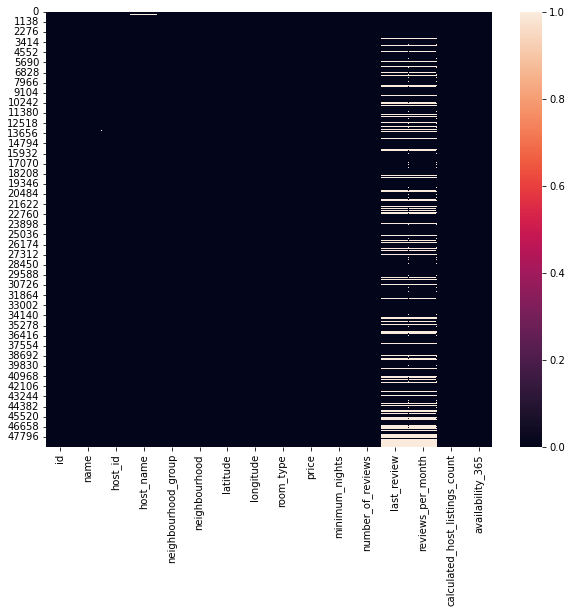

In [ ]:
# Visualizing the missing values
plt.figure(figsize = (10,8))
sns.heatmap(airbnb_data.isnull())
plt.show()

In [ ]:
# Droping the data that are not of interest
airbnb_data.drop(['id','last_review'], axis=1, inplace=True)
airbnb_data.head(3)

,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365
1,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355
2,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,1,365


In [ ]:
# Replacing all NaN values 
airbnb_data.fillna({'reviews_per_month':0}, inplace=True)
airbnb_data.fillna({'name':'unknown'}, inplace = True)
airbnb_data.fillna({'host_name':'unknown'}, inplace = True)

In [ ]:
# Now our data is cleaned
airbnb_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   name                            48895 non-null  object 
 1   host_id                         48895 non-null  int64  
 2   host_name                       48895 non-null  object 
 3   neighbourhood_group             48895 non-null  object 
 4   neighbourhood                   48895 non-null  object 
 5   latitude                        48895 non-null  float64
 6   longitude                       48895 non-null  float64
 7   room_type                       48895 non-null  object 
 8   price                           48895 non-null  int64  
 9   minimum_nights                  48895 non-null  int64  
 10  number_of_reviews               48895 non-null  int64  
 11  reviews_per_month               48895 non-null  float64
 12  calculated_host_listings_count  

## **2.Understanding Variable**

In [ ]:
# Dataset Columns
airbnb_data.columns

Index(['name', 'host_id', 'host_name', 'neighbourhood_group', 'neighbourhood',
       'latitude', 'longitude', 'room_type', 'price', 'minimum_nights',
       'number_of_reviews', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365'],
      dtype='object')

In [ ]:
# Dataset Describe of important column only
airbnb_data[['price','minimum_nights','number_of_reviews','reviews_per_month','calculated_host_listings_count','availability_365']].describe()

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000
mean,152.720687,7.029962,23.274466,1.090910,7.143982,112.781327
std,240.154170,20.510550,44.550582,1.597283,32.952519,131.622289
min,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
25%,69.000000,1.000000,1.000000,0.040000,1.000000,0.000000
50%,106.000000,3.000000,5.000000,0.370000,1.000000,45.000000
75%,175.000000,5.000000,24.000000,1.580000,2.000000,227.000000
max,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [ ]:
# Check Unique Values for each variable.
for unique_value in airbnb_data.columns:
  print("Unique values in",unique_value,"column is",airbnb_data[unique_value].nunique(),)

Unique values in name column is 47906
Unique values in host_id column is 37457
Unique values in host_name column is 11453
Unique values in neighbourhood_group column is 5
Unique values in neighbourhood column is 221
Unique values in latitude column is 19048
Unique values in longitude column is 14718
Unique values in room_type column is 3
Unique values in price column is 674
Unique values in minimum_nights column is 109
Unique values in number_of_reviews column is 394
Unique values in reviews_per_month column is 938
Unique values in calculated_host_listings_count column is 47
Unique values in availability_365 column is 366


In [ ]:
print('Unique values in neighbourhood_group is:',airbnb_data['neighbourhood_group'].unique())
print('Unique values in room_type is:',airbnb_data['room_type'].unique())

Unique values in neighbourhood_group is: ['Brooklyn' 'Manhattan' 'Queens' 'Staten Island' 'Bronx']
Unique values in room_type is: ['Private room' 'Entire home/apt' 'Shared room']


## **3.Data Wrangling**

### 1. Which room type and locality are mostly in demand in NYC ?

In [ ]:
# Most demanded room type
airbnb_data['room_type'].value_counts()

Entire home/apt    25409
Private room       22326
Shared room         1160
Name: room_type, dtype: int64

**Inference:** The most demanded room in NYC is: Entire home/apt with 25409

In [ ]:
airbnb_data.groupby('room_type')['price'].mean()

room_type
Entire home/apt    211.794246
Private room        89.780973
Shared room         70.127586
Name: price, dtype: float64

**Inference:** The average price of Entire home/apt is 212 dollars , for privare room is 89.78 $ and & shared room 70 dollars

In [ ]:
# Most demanded locality
airbnb_data['neighbourhood_group'].value_counts()

Manhattan        21661
Brooklyn         20104
Queens            5666
Bronx             1091
Staten Island      373
Name: neighbourhood_group, dtype: int64

In [ ]:
share_room_percent = round((len(airbnb_data[airbnb_data['room_type']=='Shared room'])/len(airbnb_data['room_type']))*100, 2)
print(f'only {share_room_percent} % preffers Shared Room ')

only 2.37 % preffers Shared Room 


**Inference:** Most demanded locality/neighbourhood_group is Manhattan with 21661 Bookings

### 2. Host with most number of listing in Airbnb in NYC ?

In [ ]:
top10_host_details = airbnb_data['host_id'].value_counts().head(15)
top10_host_details

219517861    327
107434423    232
30283594     121
137358866    103
16098958      96
12243051      96
61391963      91
22541573      87
200380610     65
7503643       52
1475015       52
120762452     50
2856748       49
205031545     49
190921808     47
Name: host_id, dtype: int64

In [ ]:
top10_host_df = pd.DataFrame(top10_host_details)
top10_host_df.reset_index(inplace=True)
top10_host_df.rename(columns={'index' : 'Host_id', 'host_id':'no_of_properties'}, inplace=True)
top10_host_df.head(10)

,Host_id,no_of_properties
0,219517861,327
1,107434423,232
2,30283594,121
3,137358866,103
4,16098958,96
5,12243051,96
6,61391963,91
7,22541573,87
8,200380610,65
9,7503643,52


In [ ]:
airbnb_data[airbnb_data['host_id'] == 219517861].head(1)

,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
38293,Sonder | 180 Water | Incredible 2BR + Rooftop,219517861,Sonder (NYC),Manhattan,Financial District,40.70637,-74.00645,Entire home/apt,302,29,0,0.0,327,309


**Inference:** The top host is Sonder (NYC)	 with 327 listing and 309 days Availbility

### 3. Top 10 Host with maximum number of reviews considering reviews per months

In [ ]:
top10_host_with_review = airbnb_data.loc[airbnb_data['number_of_reviews'].value_counts(),'host_id']
top10_host_with_review

10052    40532977
5244      3028267
3465         5089
2520      4069241
1994      4628887
           ...   
1            2845
1            2845
1            2845
1            2845
1            2845
Name: host_id, Length: 394, dtype: int64

In [ ]:
top10_host_with_review_df = pd.DataFrame(top10_host_with_review)
top10_host_with_review_df.reset_index(inplace=True)
top10_host_with_review_df.rename(columns={'index' :'no_of_reviews', 'host_id' : 'Host_id'}, inplace=True)
top10_host_with_review_df.head(10)

,no_of_reviews,Host_id
0,10052,40532977
1,5244,3028267
2,3465,5089
3,2520,4069241
4,1994,4628887
5,1618,3842134
6,1357,898980
7,1179,2483293
8,1127,2368133
9,964,1928213


In [ ]:
airbnb_data[airbnb_data['host_id'] == 40532977]

,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
10052,Cozy Brooklyn Private Home,40532977,Johari,Brooklyn,Bedford-Stuyvesant,40.67982,-73.91347,Entire home/apt,35,3,63,1.33,4,0
19181,Cozy Brooklyn Room,40532977,Johari,Brooklyn,Bedford-Stuyvesant,40.68137,-73.91359,Private room,38,30,5,0.15,4,0
20247,Private Room in Beautiful Brooklyn Private House.,40532977,Johari,Brooklyn,Bedford-Stuyvesant,40.68128,-73.91196,Private room,29,60,13,0.42,4,51
22680,Cozy Large Private Master bedroom,40532977,Johari,Brooklyn,Bedford-Stuyvesant,40.68017,-73.91379,Private room,36,30,15,0.61,4,0


**Inference:** Johari has most number of reviews in airbnb NYC from neighbourhood Bedford-Stuyvesant

### 4.Top 10 most reviewed properties/listings on airbnb considering reviews per months

In [ ]:
top10_reviewed_listings= airbnb_data.nlargest(10,'reviews_per_month')[['name','reviews_per_month','neighbourhood_group','price']]
top10_reviewed_listings

,name,reviews_per_month,neighbourhood_group,price
42075,Enjoy great views of the City in our Deluxe Room!,58.50,Manhattan,100
42076,Great Room in the heart of Times Square!,27.95,Manhattan,199
38870,Lou's Palace-So much for so little,20.94,Queens,45
27287,JFK Comfort.5 Mins from JFK Private Bedroom & ...,19.75,Queens,80
28651,JFK 2 Comfort 5 Mins from JFK Private Bedroom,17.82,Queens,50
29628,JFK 3 Comfort 5 Mins from JFK Private Bedroom,16.81,Queens,50
20403,Cozy Room Family Home LGA Airport NO CLEANING FEE,16.22,Queens,48
22469,Cute Tiny Room Family Home by LGA NO CLEANING FEE,16.03,Queens,48
36238,“For Heaven Cakes”,15.78,Queens,75
40297,Studio Apartment 6 minutes from JFK Airport,15.32,Queens,67


**Inference:** Property with highest number of reviews is Enjoy great views of the City in our Deluxe Room! with 58 reviews/month followed by Great Room in the heart of Times Square! with 27 reviews/month that is from Manhattan.
From the top 10, top two are from Manhattan & further 8 are from Queens

### 5. Top 5 Mostly Expensive listings on airbnb.

In [ ]:
most_expensive_listing = airbnb_data.loc[airbnb_data.groupby(['neighbourhood_group'])['price'].idxmax()][['name','neighbourhood','neighbourhood_group','host_name','price']].sort_values(by='price',ascending=False)[:5]
most_expensive_listing

,name,neighbourhood,neighbourhood_group,host_name,price
17692,Luxury 1 bedroom apt. -stunning Manhattan views,Greenpoint,Brooklyn,Erin,10000
29238,1-BR Lincoln Center,Upper West Side,Manhattan,Jelena,10000
9151,Furnished room in Astoria apartment,Astoria,Queens,Kathrine,10000
22353,Victorian Film location,Randall Manor,Staten Island,Alissa,5000
24477,"""The luxury of Comfort""",Riverdale,Bronx,Kathy,2500


**Inference:** Most Expensive listing is **Luxury 1 bedroom apt stunning Manhattan views** in Greenpoint of Brooklyn	with 10000 $ price:

### 6. Which Property type and room type is cheapest and more available on airbnb ?

In [ ]:
most_cheapest_neighgroup = airbnb_data.loc[airbnb_data.groupby(['neighbourhood_group'])['price'].idxmin()][['name','neighbourhood_group','host_name','room_type','price']].sort_values(by='price',ascending=False)
most_cheapest_neighgroup

,name,neighbourhood_group,host_name,room_type,price
45646,Happy Home 3,Staten Island,Raquel,Shared room,13
22835,IT'S SIMPLY CONVENIENT!,Queens,Maria,Entire home/apt,10
25433,★Hostel Style Room | Ideal Traveling Buddies★,Bronx,Anisha,Private room,0
23161,"Huge Brooklyn Brownstone Living, Close to it all.",Brooklyn,Kimberly,Private room,0
26259,the best you can find,Manhattan,Qiuchi,Entire home/apt,0


**Inference:** Most cheapest listing is from **IT'S SIMPLY CONVENIENT!** and **Happy Home 3** which is from Queens and Staten Island hosted by Maria and Raquel respectively. As it is cheap property so it will be more available for the customers.

Some of the properties having a price of zero which is either a free stay for specific time or the willingness of not to share the price with the Airbnb.

### 7. Top 5 neighbourhoods in NYC?

In [ ]:
df_ngroup= airbnb_data.groupby(['neighbourhood'])['price'].mean().reset_index()
df_ngroup_sorted = df_ngroup.sort_values(by='price', ascending=False)
df_ngroup_sorted[:5]

,neighbourhood,price
82,Fort Wadsworth,800.000000
219,Woodrow,700.000000
197,Tribeca,490.638418
174,Sea Gate,487.857143
167,Riverdale,442.090909


**Inference:** These are top 5 neighbourhoods in NYC, Fort Wadsworth tops the list with price 800$

### 8. Listing with least number of reviews in NYC Airbnb

In [ ]:
less_reviews = airbnb_data[(airbnb_data['reviews_per_month']<3)]
less_reviews[['name','reviews_per_month','neighbourhood','neighbourhood_group']]

,name,reviews_per_month,neighbourhood,neighbourhood_group
0,Clean & quiet apt home by the park,0.21,Kensington,Brooklyn
1,Skylit Midtown Castle,0.38,Midtown,Manhattan
2,THE VILLAGE OF HARLEM....NEW YORK !,0.00,Harlem,Manhattan
4,Entire Apt: Spacious Studio/Loft by central park,0.10,East Harlem,Manhattan
5,Large Cozy 1 BR Apartment In Midtown East,0.59,Murray Hill,Manhattan
...,...,...,...,...
48890,Charming one bedroom - newly renovated rowhouse,0.00,Bedford-Stuyvesant,Brooklyn
48891,Affordable room in Bushwick/East Williamsburg,0.00,Bushwick,Brooklyn
48892,Sunny Studio at Historical Neighborhood,0.00,Harlem,Manhattan
48893,43rd St. Time Square-cozy single bed,0.00,Hell's Kitchen,Manhattan


**Inference:** As we see there are many properties which have rating less than 3

### 9. Top Gainers(Location with Maximum no. of Bookings and revenue)?

In [ ]:
max_bookings = airbnb_data['neighbourhood'].value_counts()
max_bookings

Williamsburg          3920
Bedford-Stuyvesant    3714
Harlem                2658
Bushwick              2465
Upper West Side       1971
                      ... 
Fort Wadsworth           1
Richmondtown             1
New Dorp                 1
Rossville                1
Willowbrook              1
Name: neighbourhood, Length: 221, dtype: int64

In [ ]:
df = airbnb_data.groupby(['neighbourhood','room_type']).agg({'price':'sum'})
df.sort_values("price",ascending=False).head()

,,price
neighbourhood,room_type,
Williamsburg,Entire home/apt,389724
Midtown,Entire home/apt,331395
Upper West Side,Entire home/apt,329129
Hell's Kitchen,Entire home/apt,301786
Upper East Side,Entire home/apt,284150


**Inference:** **Williamsburg** Locationgenerated maximum revenue (**389724**) followed by Midtown, Upper West Side respectively.

## **4.Data Visulization**

#### Chart -1- Pie Chart (Univariate)

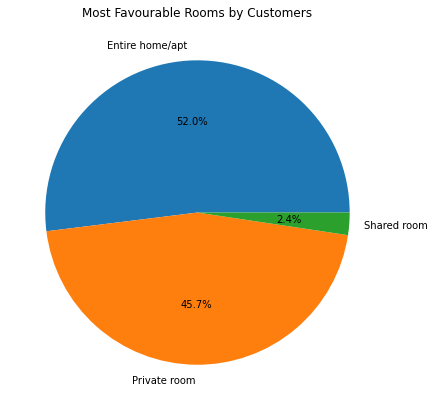

In [ ]:
plt.figure(figsize = (7,7))
x_label = airbnb_data['room_type'].value_counts().index
y_label = airbnb_data['room_type'].value_counts().values
plt.pie(x = y_label, labels = x_label, autopct='%1.1f%%')
plt.title('Most Favourable Rooms by Customers')
plt.show()

**Inference:** Most demanded room type is **Entire Home / Apartment** followed by Private Room and then Shared Room

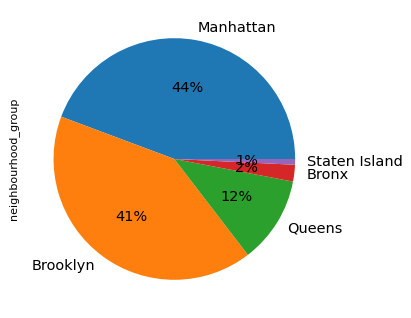

In [ ]:
fig = plt.figure(figsize=(5,5), dpi=80)
airbnb_data['neighbourhood_group'].value_counts().plot(kind='pie',  autopct='%1.0f%%', fontsize=13)
plt.show()

**Inference:** Most demanded neighbourhood_group is **Manhattan** followed by Brooklyn, queens,Bronx & Staten island respectively.

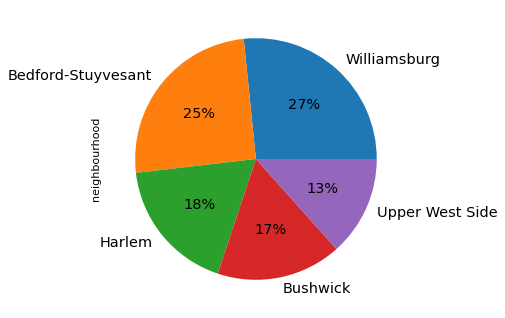

In [ ]:
fig = plt.figure(figsize=(5,5), dpi=80)
airbnb_data['neighbourhood'].value_counts().iloc[:5].plot(kind='pie',autopct='%1.0f%%',fontsize=13)
plt.show()

Inference: Most demanded neighbourhood is Williamsburg 27% of the total area is covered by Williamsburg Location, followed by Bedford-Stuyvesant covering the area of 25%. Harlem, Bushwick and Upper West Side are 18%, 17% and 13% respectively

#### Chart -2- Distribution Plot(Univariate)

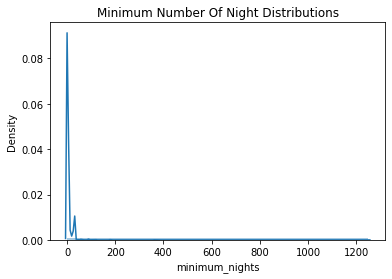

In [ ]:
sns.distplot(airbnb_data['minimum_nights'], bins=1)
plt.title('Minimum Number Of Night Distributions')
plt.show()

**Inference:** 



1.  Average booking is around 7 nights.
2.  minimum booking is for 1 night.
3.  max booking is for more than a year or we can say for few years.



/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


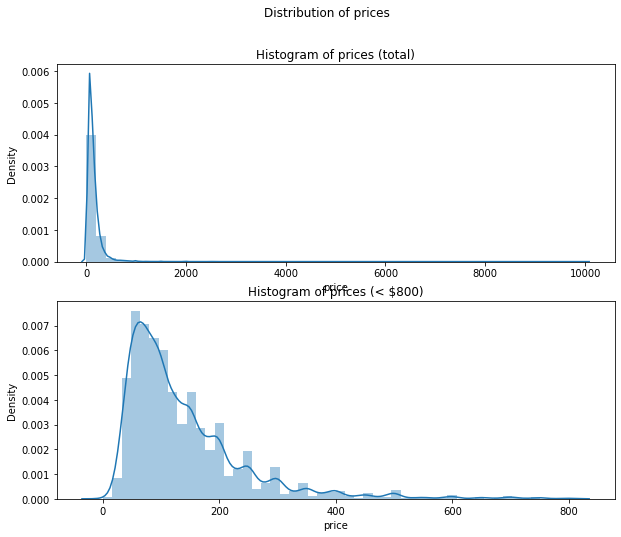

In [ ]:
fig, ax= plt.subplots(2,1, figsize=(10,8))
ax[0].set_title("Histogram of prices (total)")
sns.distplot(airbnb_data['price'], kde=True, ax=ax[0])
ax[1].set_title("Histogram of prices (< $800)")
sns.distplot(airbnb_data[airbnb_data['price'] < 800]['price'], kde=True, ax=ax[1])
fig.suptitle("Distribution of prices")
fig.show()

**Inferences:** 

1.   In this Histogram of Price Distribution, we can see that price is ranges from 0 to 800.
2.   Most of data points ranges from 0 to 400.
3.   maximum frequency of data points is around 100 $




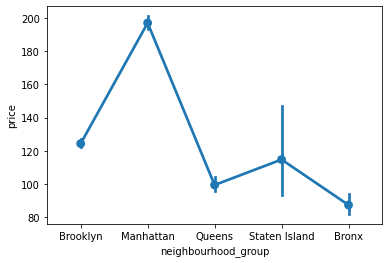

In [ ]:
sns.pointplot(x = 'neighbourhood_group', y='price', data=airbnb_data, estimator=np.mean)
plt.show()

**Inferences:** 
1. We can see that Manhattan has the highest(the costliest) average of price ranging to 150dollars/day followed by Brooklyn

2. Queens and Staten Island have same average price/day, while Bronx comes out to be the cheapest neighbourhood group in New York city.

#### Chart - 3 - Word Cloud

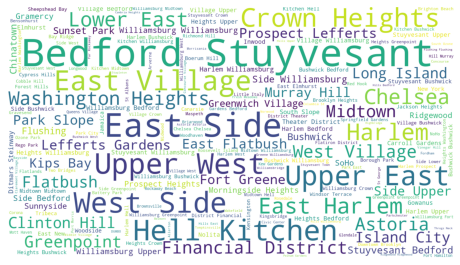

In [ ]:
from wordcloud import WordCloud
plt.subplots(figsize=(8,8),facecolor = None)
wordcloud = WordCloud(width = 1600, height = 900, background_color ='white', 
                      min_font_size = 10).generate(" ".join(airbnb_data.neighbourhood))					
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

**Inference:** By using Word Cloud we can see the **most frequently used Keyword** in Neigbourhood

#### Chart - 4 - Bar Plot on Bivariate variable (Bivariate)

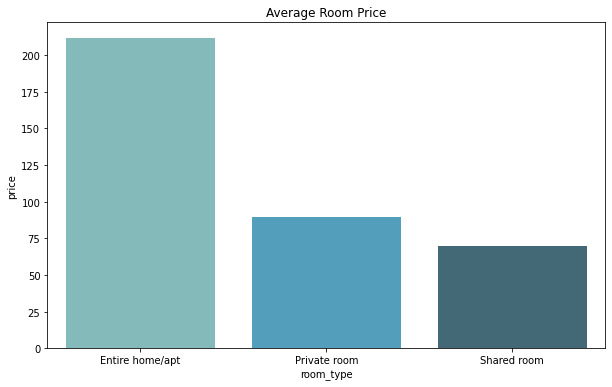

In [ ]:
df= airbnb_data.groupby('room_type', as_index=False)[['price']].mean()
x_label = df['room_type']
y_label = df['price']
plt.figure(figsize=(10,6))
sns.barplot(data=df, x=x_label, y=y_label, palette='GnBu_d')
plt.title('Average Room Price')
plt.show()

**Inferences:** 
1. Average price for **Entire room / Apartment** is just **over 200**
2. Average price for **Private room** is just **under 100**
3. Average price for **Shared roo**m is just **under 75**

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


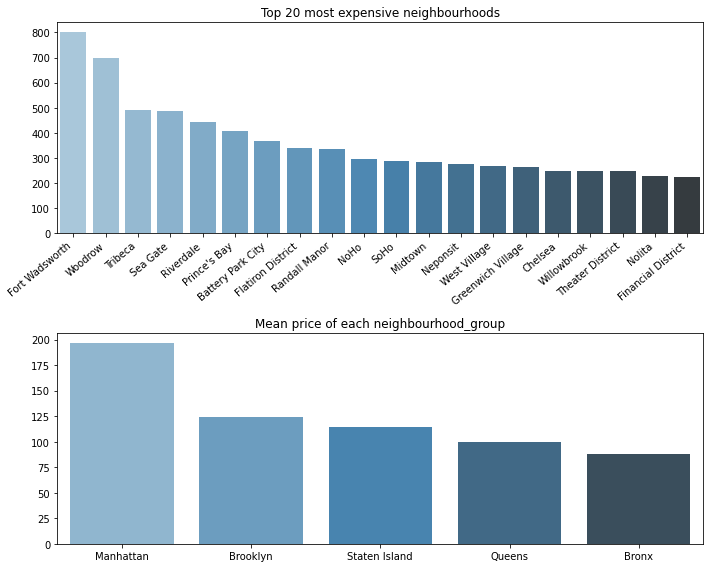

In [ ]:

fig, ax= plt.subplots(2,1, figsize=(10,8))

# To show the Top 20 most expensive neighbourhoods
d = airbnb_data.groupby('neighbourhood')['price'].mean().sort_values(ascending=False)
sns.barplot(d.index.tolist()[:20], d.values[:20], ax=ax[0], palette=("Blues_d"))
ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=40, ha="right")
ax[0].set_title('Top 20 most expensive neighbourhoods')

# To show the Mean price of each neighbourhood_group
d = airbnb_data.groupby('neighbourhood_group')['price'].mean().sort_values(ascending=False)[:5]
sns.barplot(d.index.tolist(), d.values, ax=ax[1], palette=("Blues_d"))
ax[1].set_title('Mean price of each neighbourhood_group')
fig.tight_layout()
fig.show()

**Inferences:** We can visualize top 20 most expensive neighbourhood & Mean price of each neighbourhood_group

1. **Ford Wadsworth** tops the list with price over **800 dollars**, followed by **woodrow and Tribeca** having price around **700 and 500** respectively
2. Manthattan is most expensive 

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


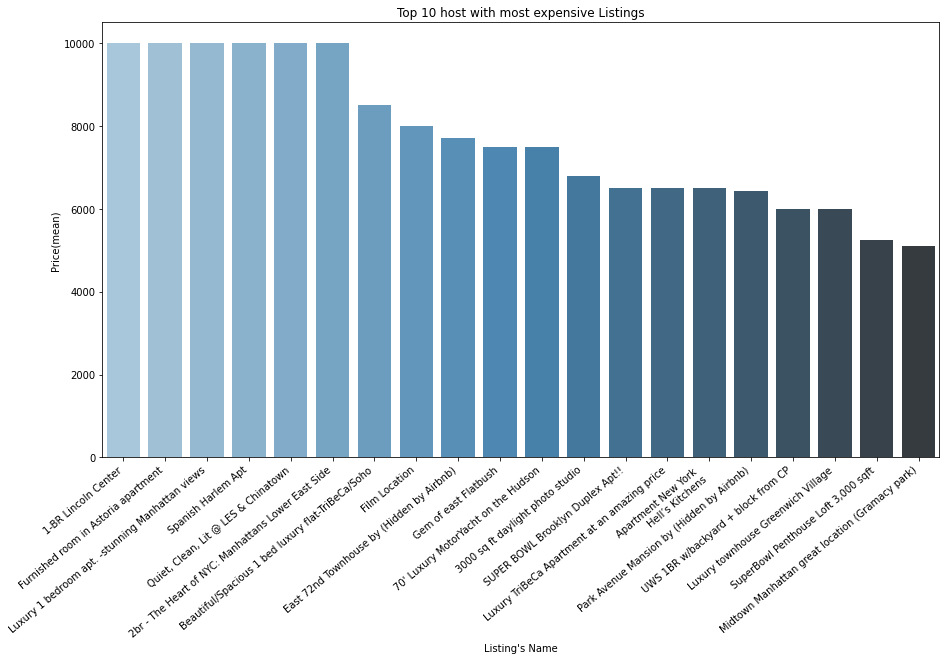

In [ ]:
fig, ax= plt.subplots(figsize=(15,8))

# To show the Top 10 host with most expensive listing on airbnb
d = airbnb_data.groupby('name')['price'].mean().sort_values(ascending=False)
ax=sns.barplot(d.index.tolist()[:20], d.values[:20], palette=("Blues_d"))
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
ax.set_xlabel("Listing's Name")
ax.set_ylabel('Price(mean)')
ax.set_title('Top 10 host with most expensive Listings')
plt.show()

**Inferences: 1-BR lincoln Center** is most expensive Listing

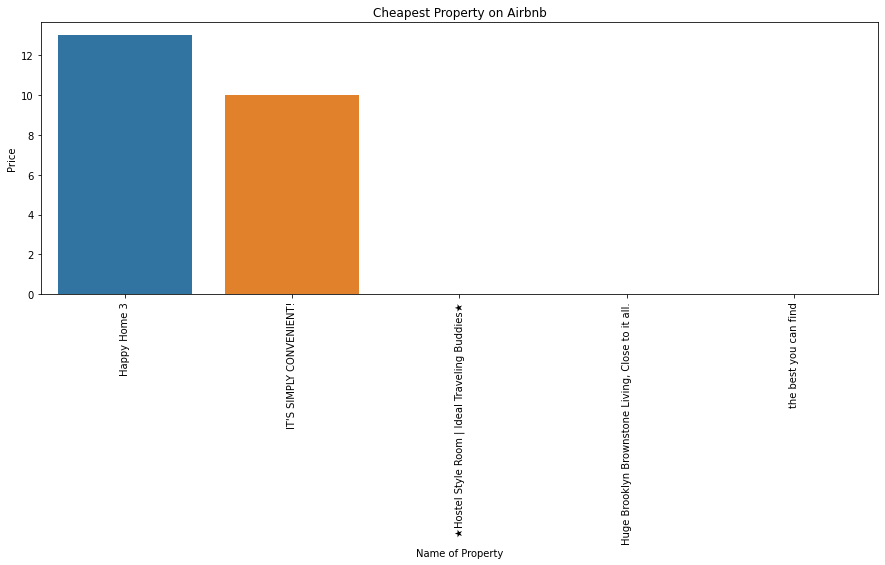

In [ ]:
plt.figure(figsize=(15,5))
data_vs=sns.barplot(x="name", y="price", data=most_cheapest_neighgroup)
data_vs.set_title('Cheapest Property on Airbnb')
data_vs.set_ylabel('Price')
data_vs.set_xlabel('Name of Property')
data_vs.set_xticklabels(data_vs.get_xticklabels(), rotation=90)
plt.show()

**Inferences:** Cheapest Property on Airbnb
1. Most cheapest listing is from IT'S SIMPLY CONVENIENT! and Happy Home 3 which is from Queens and Staten Island hosted by Maria and Raquel respectively. As it is cheap property so it will be more available for the customers.
2. Some of the properties having a price of zero which is either a free stay for specific time or the willingness of not to share the price with the Airbnb.

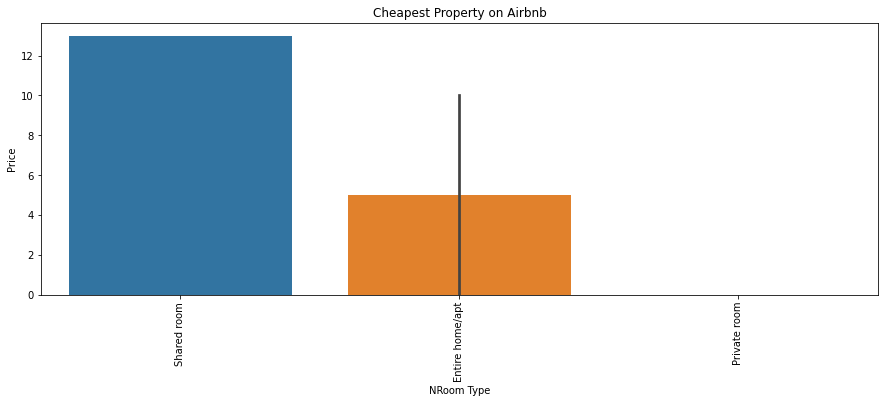

In [ ]:
plt.figure(figsize=(15,5))
data_vs=sns.barplot(x="room_type", y="price", data=most_cheapest_neighgroup)
data_vs.set_title('Cheapest Property on Airbnb')
data_vs.set_ylabel('Price')
data_vs.set_xlabel('NRoom Type')
data_vs.set_xticklabels(data_vs.get_xticklabels(), rotation=90)
plt.show()

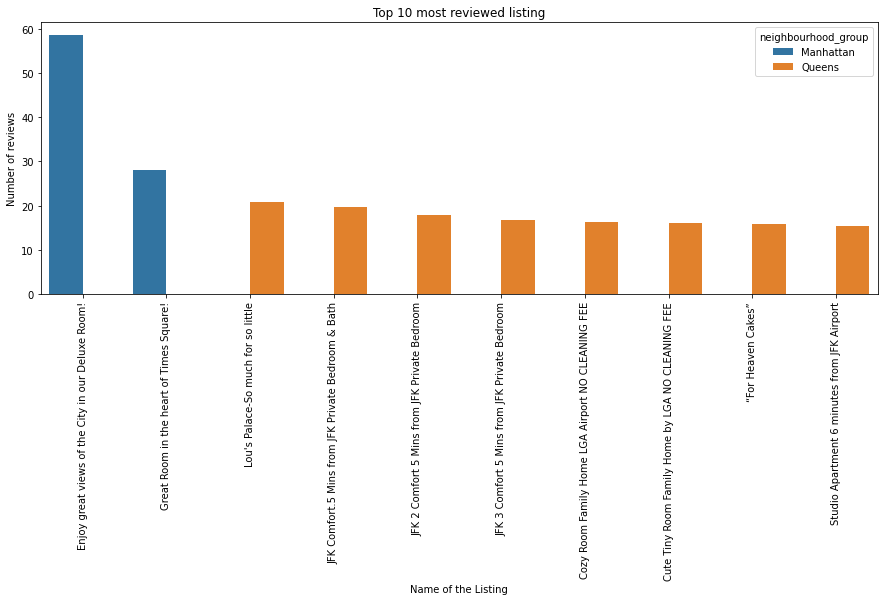

In [ ]:
plt.figure(figsize=(15,5))
data_vs=sns.barplot(x="name", y="reviews_per_month", data=top10_reviewed_listings, hue='neighbourhood_group')
data_vs.set_title('Top 10 most reviewed listing')
data_vs.set_ylabel('Number of reviews')
data_vs.set_xlabel('Name of the Listing')
data_vs.set_xticklabels(data_vs.get_xticklabels(), rotation=90)
plt.show()

**Inferences:** We see here Top 10 most reviewed listing in Airbnb.
1. **Enjoy great views of the city in our Deluxe Room** is most reviewed listing of Manhattan





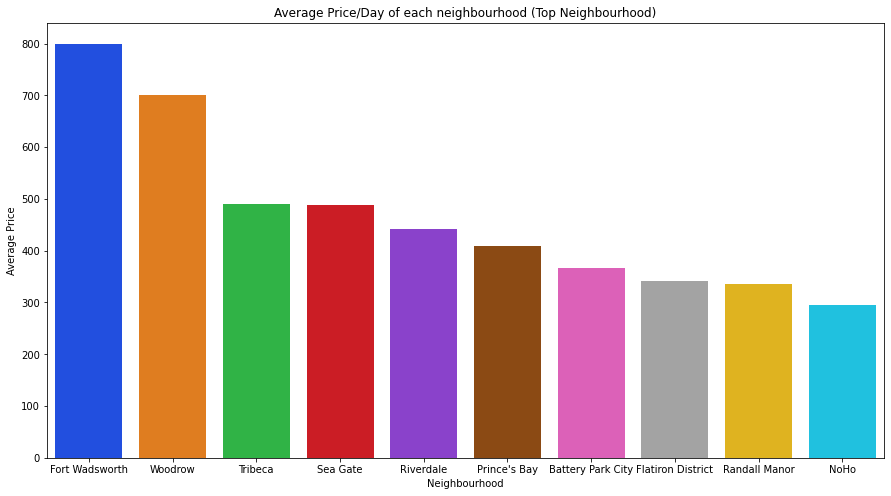

In [ ]:
fig = plt.subplots(figsize=(15,8))
ax=sns.barplot(data=df_ngroup_sorted[:10], x='neighbourhood', y='price', palette="bright")
plt.title("Average Price/Day of each neighbourhood (Top Neighbourhood)")
plt.xlabel('Neighbourhood')
plt.ylabel('Average Price')
plt.show()

**Inference:** Ford Wadsworth tops the list with price over 800 dollars, followed by woodrow and Tribeca having price around 700 and 500 respectively

#### Chart - 5 - Correlation Heatmap

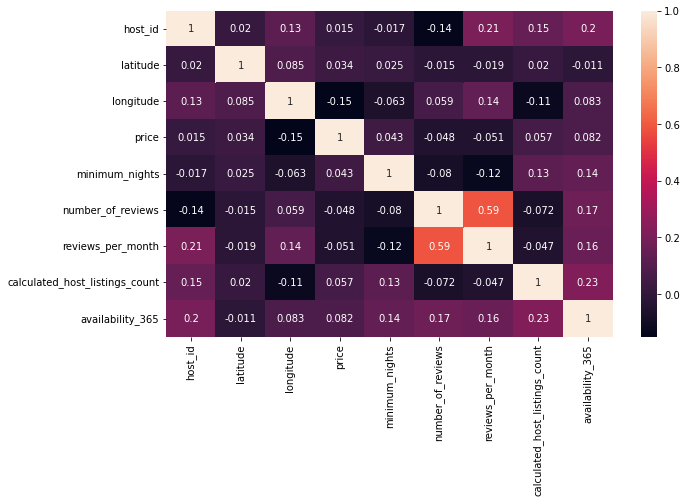

In [76]:
corr = airbnb_data.corr()
plt.figure(figsize = (10,6))
sns.heatmap(corr, annot=True)
plt.show()

**Inferences:** We can see here that apart from number of Reviews & Reviews per Month There is no significant Correlation between any Variables

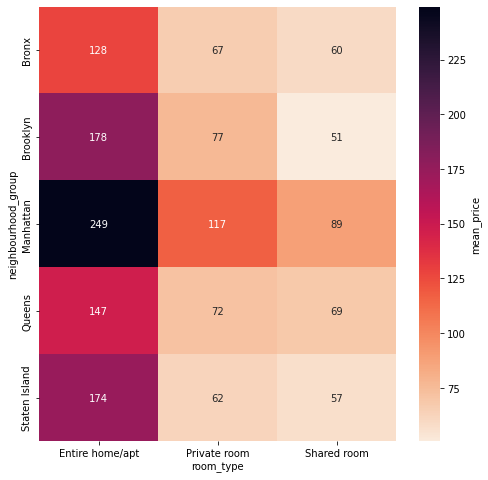

In [77]:
plt.figure(figsize = (8,8))
sns.heatmap(airbnb_data.groupby(['neighbourhood_group', 'room_type']).price.mean().unstack(), annot=True, fmt=".0f", cmap = sns.cm.rocket_r, cbar_kws={'label': 'mean_price'})

**Inferences:** 
1. With **249** Mean Price of Entire Home / Apartment,  **Manhattan becomes Most Expensive**
2. With **51** Mean Price of Shared Room,  **Brooklyn becomes Most Cheapest**

#### Chart - 6 - Violin plot (Bivariate)

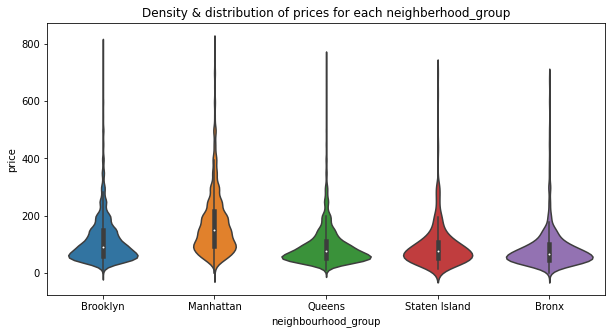

In [78]:
plt.figure(figsize = (10,5))
fig = sns.violinplot(data = airbnb_data, x = 'neighbourhood_group', y = airbnb_data[airbnb_data['price'] < 800]['price'])
fig.set_title('Density & distribution of prices for each neighberhood_group')
plt.show()

**Inferences:** 
1. **Manhattan** being the most costliest place to live in followed by **Brooklyn.**
2. Queens, Staten Island are on the same page with price on listings.

#### Chart - 7 - Boxplot(Bivariate)

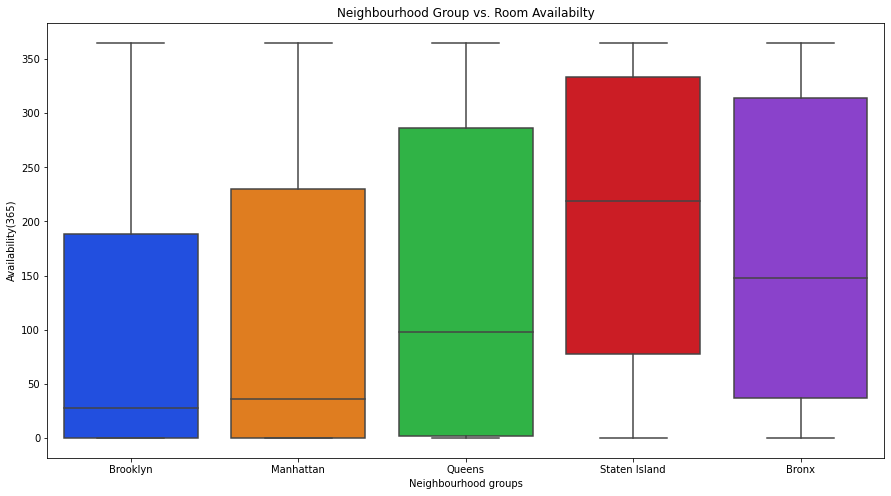

In [79]:
fig = plt.subplots(figsize=(15,8))
ax=sns.boxplot(data=airbnb_data, x='neighbourhood_group', y='availability_365', palette="bright")
plt.title("Neighbourhood Group vs. Room Availabilty")
plt.xlabel('Neighbourhood groups')
plt.ylabel('Availability(365)')
plt.show()

**Inferences:**
1. **staten island** has more avaliability of rooms throghout the year(more than **300 days**).
2. In **Bronx** every property are available for **150** on an average every year.

#### Chart - 8 - Scatter Plot (Multivariate)

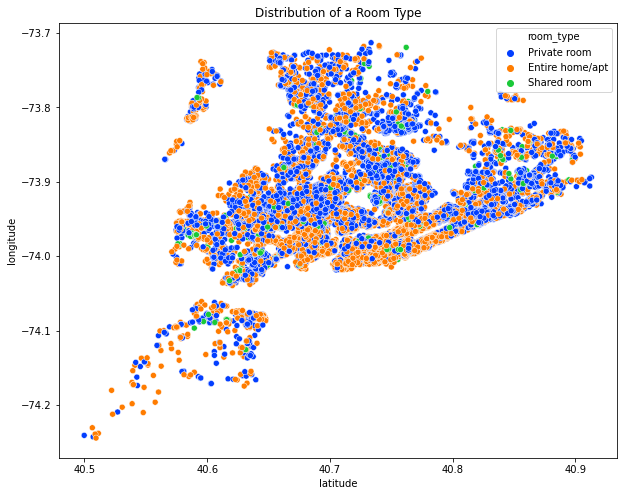

In [80]:
plt.figure(figsize=(10,8))
sns.scatterplot(x=airbnb_data.latitude, y=airbnb_data.longitude, hue=airbnb_data.room_type , palette='bright')
plt.title('Distribution of a Room Type')
plt.show()

**Inferences:** From above scatterplots of latitude vs longitude, we can see that there's is very less shared room throughout NYC as compared to private and Entire home/apt. 95% of the listings on Airbnb are either Private room or Entire/home apt.

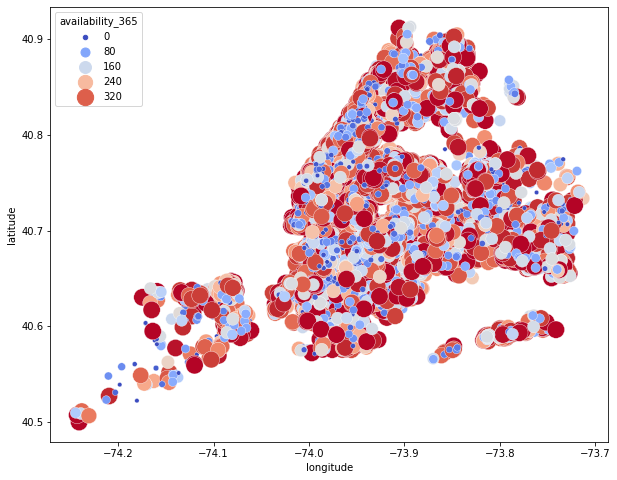

In [81]:
plt.subplots(figsize=(10, 8))
sns.scatterplot(data=airbnb_data,x='longitude', y='latitude', hue="availability_365",palette='coolwarm',size='availability_365', sizes=(20,300))
plt.show()

**Inferences: Bronx & Staten Island** has listings which are mostly available throughout the year

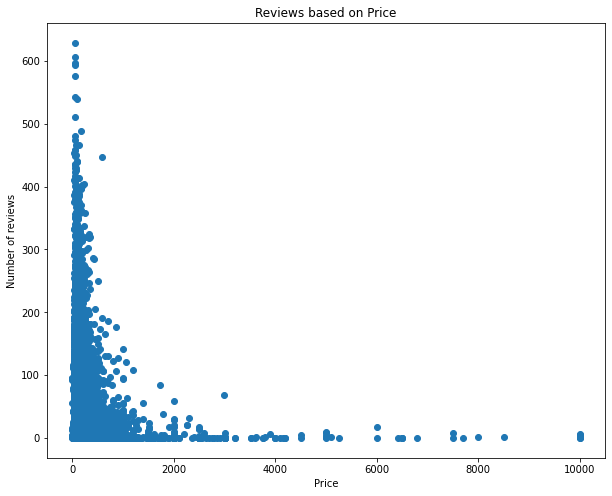

In [82]:
price = airbnb_data['price']
price_review = airbnb_data[['number_of_reviews', 'price']].sort_values(by = 'price')
price_review.plot(x = 'price', y = 'number_of_reviews', style = 'o', figsize=(10,8), legend=False)

plt.title('Reviews based on Price')
plt.xlabel("Price")
plt.ylabel("Number of reviews")
plt.show()

**Inferences:**
1. Most of the data points lies under 2000 dollars
2. we can clearly see that number of reviews, a listing receives does not have much of an impact on the price.
3. Mostly cheaper listing has more number of reviews

### Chart - 9 - Cat Plot (Multivariate)

<Figure size 720x720 with 0 Axes>

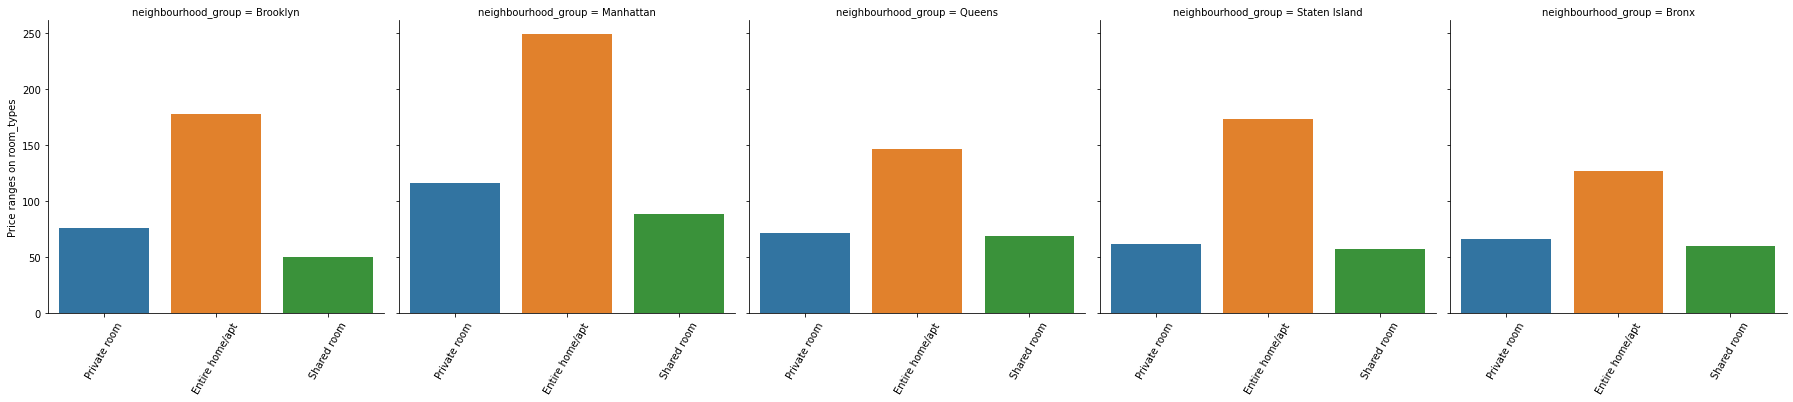

In [83]:
plt.figure(figsize=(10,10))

fig = sns.catplot(data=airbnb_data, x="room_type", y="price", col="neighbourhood_group", kind="bar", ci=None)
fig.set_axis_labels("","Price ranges on room_types")
fig.set_xticklabels(["Private room", "Entire home/apt", "Shared room"],rotation=60)
plt.show()

**Inference:** Above chart shows us the Price range of different room type  in Each Neighbourhood group seperately

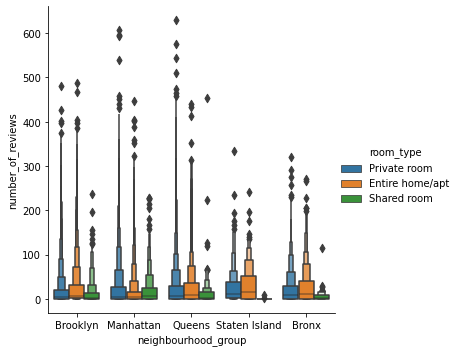

In [84]:
a= sns.catplot(x='neighbourhood_group', y='number_of_reviews', hue='room_type',kind='boxen',data=airbnb_data)

**Inference:** Above chart shows us the number of reviews of different room type in Each Neighbourhood group seperately